In [1]:
!python3 --version

Python 3.11.9


In [2]:
!pip3 


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [4]:
!pip3 install ipykernel # установка ядра для jupyter


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nasta\Downloads\surnames.csv")
df.head()

,Unnamed: 0,plural,male,female,title,male_eng,female_eng
0,0,Абаза,Абаза,Абаза,2,abaza,abaza
1,1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova
2,2,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
3,3,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
4,4,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova


In [6]:
len(df)

8670

Удаление дубликатов

In [7]:
df_unique = df.drop_duplicates(subset=['female_eng'])
df_cleaned = df_unique.dropna()



df_cleaned = df_cleaned.reset_index()
del df_cleaned['Unnamed: 0']
del df_cleaned['index']

df = df_cleaned


Переиндексация

In [8]:
df = df.assign(male_cnt = '-', female_cnt = '-')
df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,-,-
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,-,-
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,-,-
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,-,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,-,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


Добавление нужных колонок в датафрейм.

In [9]:
df = df.assign(male_cnt = '-', female_cnt = '-')
df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,-,-
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,-,-
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,-,-
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,-,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,-,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


Сбор и обработка данных 

In [ ]:
from bs4 import BeautifulSoup
from lxml import html
from selenium import webdriver
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from multiprocessing.pool import ThreadPool as Pool
import requests
from selenium import webdriver
import time
from fake_useragent import UserAgent

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from multiprocessing.pool import ThreadPool as Pool
import requests
from selenium import webdriver
import time
from fake_useragent import UserAgent

ua = UserAgent()   

def browser_start(profile):
    opts = Options()
    ua = UserAgent()  
    opts.add_argument(f"user-agent={profile}")
    opts.add_argument("--disable-extensions")
    opts.add_argument("--disable-gpu")
    opts.add_argument("--headless=new") 
    opts.page_load_strategy = "eager"
    driver = webdriver.Chrome(options=opts)
    return driver


def pasing_web(driver):
    list_of_male = df['male_eng'].tolist()
    list_of_female = df['female_eng'].tolist()
    for i in range(0, 4293):
        print(i) #логгирование
        male_name = list_of_male[i]
        url= f"https://forebears.io/ru/surnames/{male_name}"
        driver.maximize_window()
        driver.get(url)
        curr = driver.current_url
        if curr == "https://forebears.io/":
            continue
        content = driver.page_source.encode('utf-8').strip()
        bs = BeautifulSoup(content,"lxml")
        results = bs.findAll("tr", {"data-pid" : "13963"})
        if (len(results) == 0):
            df.iat[i, 6] = 0
            continue
        res = results[0].findAll("td")[1]
        count = res.getText()
        count = count.split(",")
        count = int("".join(count))
        df.iat[i, 6] = count
ua = UserAgent()
profile_1 = ua.random
profile_2 = ua.random
profile_3 = ua.random

browser1=browser_start('profile_1')
browser2=browser_start('profile_2')
browser3=browser_start('profile_3')

dataset=[browser1,browser2]
with Pool() as pool:
    result = pool.map(pasing_web,dataset)
result

In [ ]:
def pasing_web2(driver):

    list_of_female = df['female_eng'].tolist()
    for i in range(0, 4293):
        print(i)
        female_name = list_of_female[i]
        url= f"https://forebears.io/ru/surnames/{female_name}"
        driver.maximize_window()
        driver.get(url)
        curr = driver.current_url
        if curr == "https://forebears.io/":
            continue
        content = driver.page_source.encode('utf-8').strip()
        bs = BeautifulSoup(content,"lxml")
        results = bs.findAll("tr", {"data-pid" : "13963"})
        if (len(results) == 0):
            df.iat[i, 7] = 0
            continue
        res = results[0].findAll("td")[1]
        count = res.getText()
        count = count.split(",")
        count = int("".join(count))
        df.iat[i, 7] = count
ua = UserAgent()
profile_1 = ua.random
profile_2 = ua.random
profile_3 = ua.random

browser1=browser_start('profile_1')
browser2=browser_start('profile_2')
browser3=browser_start('profile_3')

dataset=[browser1,browser2]
with Pool() as pool:
    result = pool.map(pasing_web2,dataset)
result

Итоговый датафрейм:

In [10]:
df = pd.read_csv(r"surnames_itog.csv") #файл с итогами
df.head(4300)

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,412,412
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,7187,8511
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,2,2
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,0,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,1,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


In [11]:
fem_count_= df['female_cnt'].tolist()
fem_count = len([item for item in fem_count_ if item != 0 and item != '-'])
male_count_ = df['male_cnt'].tolist()
male_count = len([item for item in male_count_ if item != 0 and item != '-'])
summ = fem_count + male_count
summ #всего фамилий (мужских + женских), которые были найдены в России

7111

Топ-10 самых непопулярных фамилий в России

In [12]:
fem_sur = df['female_eng'].tolist()
male_sur = df['male_eng'].tolist()
surname = male_sur + fem_sur
count = male_count_ + fem_count_


nesort_df = pd.DataFrame({"Surname": surname, "Count": count})
dff  = nesort_df.head(10)
nesort_df = nesort_df.drop(nesort_df[nesort_df['Count'] == '-'].index)
sort_df = nesort_df.sort_values(by = "Count")
 #Топ нераспространенности в России, если учитывать нулевые значения
sort_df.head(10)

,Surname,Count
8580,jatskevich,0
4645,bippen,0
4642,bildeman,0
4636,beshentsova,0
4619,beringi,0
435,bordenav,0
4593,belyaki,0
6968,oppeli,0
4554,beked,0
4461,bagdadova,0


Гистаграма по фамилиям, где по оси X - фамилии, а по оси Y - количество фамилий в России

In [ ]:
import matplotlib.pyplot as plt
filtered_df = sort_df.iloc[::100]

plt.figure(figsize=(200, 60))
plt.bar(filtered_df['Surname'], filtered_df['Count'], color='skyblue', width = 20)
plt.xlabel('Фамилии')
plt.ylabel('Количество в России')
plt.title('Гистограмма по фамилиям в России')
plt.xticks(rotation='vertical')
plt.rc('xtick', labelsize=100)
plt.rc('ytick', labelsize=100)
plt.show()

In [14]:
df.to_csv('surnames_itog.csv', index=False)

In [20]:
df = df.drop(df[(df['male_cnt'] == '-') | (df["female_cnt"] == '-')].index)
df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt,Total_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,412,412,412412
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,7187,8511,71878511
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,2,2,22
5,Абловы,Аблов,Аблова,6,ablov,ablova,177,244,177244
6,Абрамовы,Абрамов,Абрамова,2,abramov,abramova,81978,94995,8197894995
...,...,...,...,...,...,...,...,...,...
4277,Ярцевы,Ярцев,Ярцева,1,jartsev,jartseva,2,3,23
4279,Ярыгины,Ярыгин,Ярыгина,2,jarygin,jarygina,1,1,11
4283,Ястребовы,Ястребов,Ястребова,3,jastrebov,jastrebova,2,1,21
4285,Яфа,Яфа,Яфа,3,jafa,jafa,0,0,00


In [34]:
df["male_cnt"] = df["male_cnt"].astype(int)
df["female_cnt"] = df["female_cnt"].astype(int)

In [36]:

df = df.assign(Total_cnt = df["male_cnt"].astype(int) + df["female_cnt"].astype(int))

df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt,Total_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,412,412,824
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,7187,8511,15698
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,2,2,4
5,Абловы,Аблов,Аблова,6,ablov,ablova,177,244,421
6,Абрамовы,Абрамов,Абрамова,2,abramov,abramova,81978,94995,176973
...,...,...,...,...,...,...,...,...,...
4277,Ярцевы,Ярцев,Ярцева,1,jartsev,jartseva,2,3,5
4279,Ярыгины,Ярыгин,Ярыгина,2,jarygin,jarygina,1,1,2
4283,Ястребовы,Ястребов,Ястребова,3,jastrebov,jastrebova,2,1,3
4285,Яфа,Яфа,Яфа,3,jafa,jafa,0,0,0


In [47]:
filtered_df = df.iloc[::10]
filtered_df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt,Total_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,412,412,824
14,Авдуловы,Авдулов,Авдулова,2,avdulov,avdulova,239,202,441
24,Агреневы,Агренев,Агренева,3,agrenev,agreneva,10,1,11
37,Акимкины,Акимкин,Акимкина,3,akimkin,akimkina,1248,1333,2581
51,Албини,Албини,Албини,3,albini,albini,2,2,4
...,...,...,...,...,...,...,...,...,...
4207,Эмировы,Эмиров,Эмирова,2,emirov,emirova,1224,858,2082
4218,Эттинген,Эттинген,Эттинген,2,ettingen,ettingen,1,1,2
4237,Юровы,Юров,Юрова,2,jurov,jurova,0,10,10
4254,Якубовский,Якубовский,Якубовская,2,jakubovsky,jakubovskaya,2,1,3


Диаграмма рассеивания: по оси OX - количество носителей фамилии в России, по оси OY - дореволюционный уровень дворянства

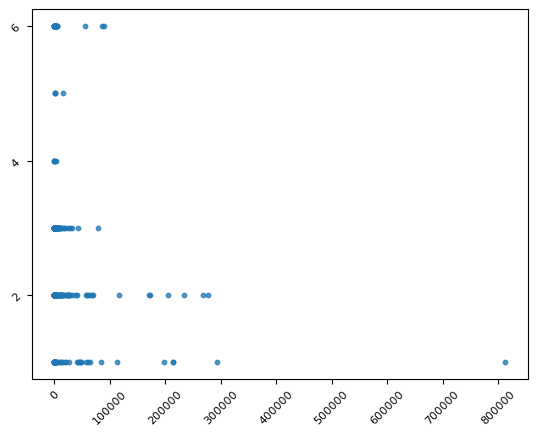

In [48]:
plt.scatter(filtered_df["Total_cnt"],filtered_df["title"], s = 10, alpha = 0.75)
plt.locator_params(axis="x", nbins=15)  
plt.locator_params(axis="y", nbins=5) 
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)

plt.show()